<a href="https://colab.research.google.com/github/mockcube/Intro-to-ML-algorithms/blob/main/machine_learning_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [ ]:
# Importing the dataset and extracting the independent and dependent variables
companies = pd.read_csv('datasets\1000_Companies.csv')
X = companies.iloc[:, :-1].values
y = companies.iloc[:, 4].values

companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


<AxesSubplot:>

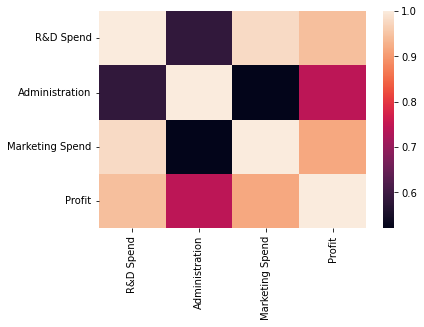

In [ ]:
# Data visualiation
# Building the correlation matrix
sns.heatmap(companies.corr())

In [ ]:
# Encoding the categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])

onehotencoder= OneHotEncoder()
X = onehotencoder.fit_transform(X).toarray()
print(X)

[[0. 1. 1. ... 0. 0. 1.]
 [0. 1. 1. ... 1. 1. 0.]
 [0. 1. 1. ... 1. 1. 0.]
 ...
 [0. 1. 1. ... 1. 1. 0.]
 [0. 1. 1. ... 1. 1. 0.]
 [0. 1. 1. ... 0. 0. 1.]]


In [ ]:
X = X[:, 1:]

In [ ]:
# Splitting the dataset into the Training set test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred

array([119739.1112049 , 117852.74161431, 119759.38130499, 118669.49914559,
       118034.58780956, 117911.59551241, 118512.21917964, 120236.90851429,
       117791.5775587 , 119857.86269148, 119562.31654545, 118642.89103913,
       119320.31113669, 118276.35022165, 119150.43009213, 117816.23782819,
       118935.07457521, 119150.43009213, 118644.77429555, 117791.5775587 ,
       118001.81603145, 120508.37814412, 118669.49914559, 120016.59630406,
       118933.66728173, 119081.26044176, 119337.78099683, 119886.33525131,
       118350.91115655, 119150.43009213, 118113.14872959, 119488.49510469,
       117665.05794732, 118804.47606721, 119493.276563  , 119354.7861144 ,
       117791.5775587 , 118669.49914559, 118669.49914559, 118961.74043538,
       118255.30917382, 119150.43009213, 119388.85433213, 117890.25271742,
       118612.24332888, 118477.52485141, 118662.72176548, 119575.13457383,
       118698.27425577, 118436.38646744, 118669.49914559, 118669.49914559,
       118939.13160315, 1

In [ ]:
# Calculating the Coefficients
print(regressor.coef_)

[-22622.74695869   1546.20343812 -22183.9705384  ...   1037.39452542
    556.46357888   -321.45800801]


In [ ]:
# Calculating the intercepts
print(regressor.intercept_)

118113.03556670998


In [ ]:
# Calculating the R squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-0.004301591151621986

In [ ]:
#Logistic regression
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
digits = load_digits()

In [ ]:
print("Image Data Shape", digits.data.shape)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


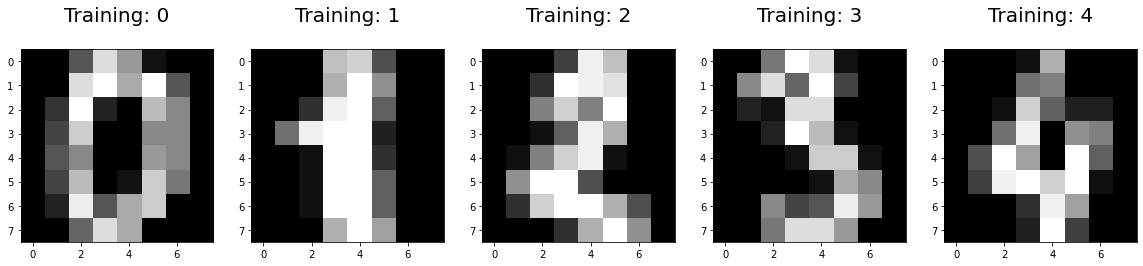

In [ ]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index+1)
    plt.imshow(np.reshape(image, (8, 8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.23, random_state=2)

In [ ]:
print(x_train.shape)

(1383, 64)


In [ ]:
print(y_train.shape)

(1383,)


In [ ]:
print(x_test.shape)

(414, 64)


In [ ]:
print(y_test.shape)

(414,)


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

C:\Users\usuario\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Returns a NumPy array
# Predict for one observation (image)

print(logisticRegr.predict(x_test[0].reshape(1, -1)))

[4]


In [ ]:
logisticRegr.predict(x_test[0:10])

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6])

In [ ]:
predictions = logisticRegr.predict(x_test)

In [ ]:
score = logisticRegr.score(x_test, y_test)
print(score)

0.9516908212560387


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [ ]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[37  0  0  0  1  0  0  0  0  0]
 [ 0 45  0  1  0  0  0  0  1  1]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  1  1  0]
 [ 0  0  0  0 34  0  0  0  3  1]
 [ 0  1  0  0  1 44  0  0  0  0]
 [ 0  1  0  0  0  0 39  0  1  0]
 [ 0  0  0  0  0  0  0 45  1  0]
 [ 0  0  0  0  0  0  0  0 37  1]
 [ 0  0  0  2  0  1  0  0  1 30]]


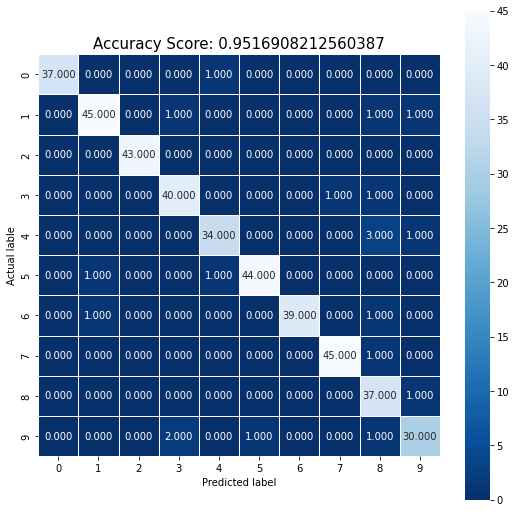

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths = .5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual lable');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size=15);

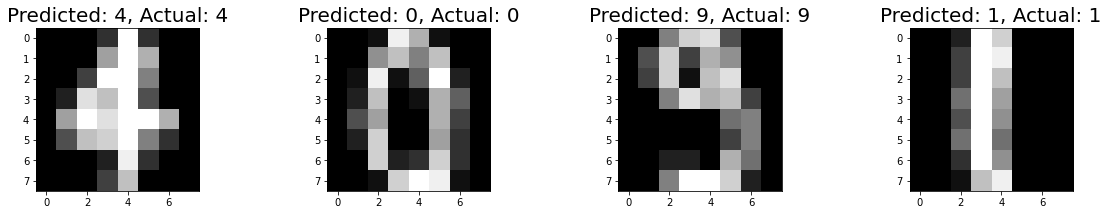

In [ ]:
index = 0
classifiedIndex = []
for predict, actual in zip(predictions, y_test):
    if predict==actual:
        classifiedIndex.append(index)
    index+=1
plt.figure(figsize=(20,3))
for plotIndex, wrong in enumerate(classifiedIndex[0:4]):
    plt.subplot(1,4, plotIndex +1)
    plt.imshow(np.reshape(x_test[wrong], (8,8)),cmap=plt.cm.gray)
    plt.title("Predicted: {}, Actual: {}".format(predictions[wrong], y_test[wrong]), fontsize=20)

In [ ]:
# Decision Tree
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

# Loading data file
balance_data = pd.read_csv('datasets/Decision_Tree_Dataset.csv', sep=',', header = 0)

In [ ]:
len(balance_data)

1000

In [ ]:
print(balance_data.shape)

(1000, 6)


In [ ]:
balance_data.head()

,1,2,3,4,sum,Unnamed: 5
0,201,10018,250,3046,13515,yes
1,205,10016,395,3044,13660,yes
2,257,10129,109,3251,13746,yes
3,246,10064,324,3137,13771,yes
4,117,10115,496,3094,13822,yes


In [ ]:
print(balance_data.values[0:, 1:5])

[[10018 250 3046 13515]
 [10016 395 3044 13660]
 [10129 109 3251 13746]
 ...
 [14872 613 4760 20561]
 [14926 897 4572 20700]
 [14798 834 4937 20737]]


In [ ]:
# Separating the Target variable
X = balance_data.values[:, 0:4]
Y = balance_data.values[:,5]

# Splitting Dataset into Test and Train
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

# Function to perform training with entropy
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 3, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [ ]:
# Function to make Predictions
y_pred_en = clf_entropy.predict(X_test)
y_pred_en

array(['yes', 'yes', 'No', 'yes', 'No', 'yes', 'yes', 'yes', 'No', 'No',
       'No', 'No', 'yes', 'No', 'No', 'yes', 'yes', 'No', 'yes', 'No',
       'No', 'yes', 'No', 'yes', 'yes', 'No', 'No', 'yes', 'No', 'No',
       'No', 'yes', 'yes', 'yes', 'yes', 'No', 'No', 'No', 'yes', 'No',
       'yes', 'yes', 'yes', 'No', 'No', 'yes', 'yes', 'yes', 'No', 'No',
       'yes', 'No', 'yes', 'yes', 'yes', 'yes', 'No', 'yes', 'No', 'yes',
       'yes', 'No', 'yes', 'yes', 'No', 'yes', 'yes', 'yes', 'No', 'No',
       'No', 'No', 'No', 'yes', 'No', 'yes', 'yes', 'No', 'yes', 'No',
       'No', 'No', 'No', 'yes', 'No', 'yes', 'No', 'yes', 'yes', 'No',
       'yes', 'yes', 'yes', 'yes', 'yes', 'No', 'yes', 'yes', 'yes',
       'yes', 'No', 'No', 'yes', 'yes', 'No', 'yes', 'yes', 'yes', 'No',
       'yes', 'yes', 'yes', 'yes', 'No', 'No', 'yes', 'yes', 'yes', 'No',
       'No', 'No', 'No', 'yes', 'yes', 'No', 'yes', 'yes', 'yes', 'No',
       'No', 'yes', 'yes', 'No', 'yes', 'yes', 'yes', 'No', 'ye

In [ ]:
print("Accuracy is ", accuracy_score(y_test, y_pred_en)*100)

Accuracy is  93.66666666666667


In [ ]:
# Random Forest
# Loading the library with iris dataset
from sklearn.datasets import load_iris
# Loading Scikit's random forest classifier library
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
# Setting the random seed
np.random.seed(0)

In [ ]:
# Creating an object called iris with iris data
iris = load_iris()

# creating a dataframe with the four feature variables
df = pd.DataFrame(iris.data, columns=iris.feature_names)

df.head()
#print(iris)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# Adding a new column for the species name
df['species'] = pd.Categorical.from_codes(iris.target,
                                         iris.target_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# Creating Test and Train data
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,is_train
0,5.1,3.5,1.4,0.2,setosa,True
1,4.9,3.0,1.4,0.2,setosa,True
2,4.7,3.2,1.3,0.2,setosa,True
3,4.6,3.1,1.5,0.2,setosa,True
4,5.0,3.6,1.4,0.2,setosa,True


In [ ]:
# Creating dataframes with test rows and taining rows
train, test = df[df['is_train']==True], df[df['is_train']==False]
# Show the no of observations for the test and training dataframes
print('Number of observations in the training data:', len(train))
print('Number of observations in the test data', len(test))

Number of observations in the training data: 118
Number of observations in the test data 32


In [ ]:
# Create a list of the feature column's names
features = df.columns[:4]
features

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [ ]:
# Converting each species name into digits
y = pd.factorize(train['species'])[0]
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [ ]:
# Creating arandom forest Classifier.
clf = RandomForestClassifier(n_jobs=2, random_state=0)
# Training the classifier
clf.fit(train[features], y)

RandomForestClassifier(n_jobs=2, random_state=0)

In [ ]:
# Applying the trained Classifier to the test
clf.predict(test[features])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [ ]:
# Viewing the predicted probabilities of the first 10 observations
clf.predict_proba(test[features])[10:20]

array([[1.  , 0.  , 0.  ],
       [0.99, 0.01, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.67, 0.33],
       [0.  , 1.  , 0.  ],
       [0.  , 0.82, 0.18],
       [0.  , 0.03, 0.97],
       [0.  , 0.42, 0.58],
       [0.  , 0.99, 0.01],
       [0.  , 0.96, 0.04]])

In [ ]:
# mapping names for the plants for each predicted plant class
preds=iris.target_names[clf.predict(test[features])]
preds[:5]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa'], dtype='<U10')

In [ ]:
# Viewing the ACTUAL species for the first five observations
test['species'].head()

7     setosa
8     setosa
10    setosa
13    setosa
17    setosa
Name: species, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']

In [ ]:
# Creating confusion matrix
pd.crosstab(test['species'], preds, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,setosa,versicolor,virginica
Actual Species,,,
setosa,13,0,0
versicolor,0,5,2
virginica,0,0,12


In [ ]:
preds=iris.target_names[clf.predict( [[5.0, 3.6, 1.4, 2.0], [5.0, 3.6, 1.4, 2.0]] )]
preds

C:\Users\usuario\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['setosa', 'setosa'], dtype='<U10')

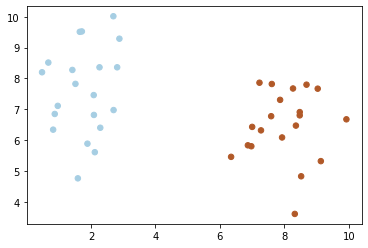

In [ ]:
# Support Vector Machine
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
# We create 40 separate points
X, y = make_blobs(n_samples=40, centers=2, random_state=20)
# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear', C=1)
clf.fit(X, y)

# display the data in graph form
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
plt.show()

In [ ]:
# Using to predict unknown data
newData = [[3,4], [5,6]]
print(clf.predict(newData))

[0 1]


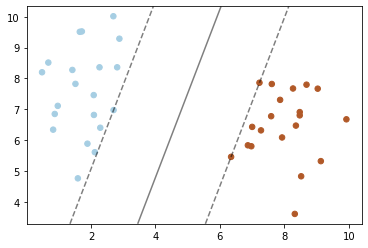

In [ ]:
# fit the model, don't reguralize for illustration purposes
clf = svm.SVC(kernel='linear', C = 1000)
clf.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
# create grid to evluate the model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1],
          alpha=0.5,
          linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0],
          clf.support_vectors_[:, 1], s=100,
          linewidth=1, facecolors='none')
plt.show()

KNN - Predict whether a person will have diabetes or not.

In [ ]:
# K Nearest Neighbors
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [ ]:
dataset = pd.read_csv('datasets/diabetes.csv')

In [ ]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
len(dataset)

768

In [ ]:
# Replace zeros
zero_not_accepted = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']

for column in zero_not_accepted:
    dataset[column] = dataset[column].replace(0, np.NaN)
    mean = int(dataset[column].mean(skipna=True))
    dataset[column] = dataset[column].replace(np.NaN, mean)

In [ ]:
# Split dataset
X = dataset.iloc[:, 0:8]
y = dataset.iloc[:, 8]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [ ]:
# Feature scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
# Define the model: Init K-NN
classifier = KNeighborsClassifier(n_neighbors=11, p=2, metric='euclidean')

In [ ]:
# Fit model
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [ ]:
# Predict the test set results
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [ ]:
# Evaluate model
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[94 13]
 [15 32]]


In [ ]:
print(f1_score(y_test, y_pred))

0.6956521739130436


In [ ]:
print(accuracy_score(y_test, y_pred))

0.8181818181818182


K-Means Clustering - Finding optimal store locations to maximize revenue

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() # for plot styling
import numpy as np

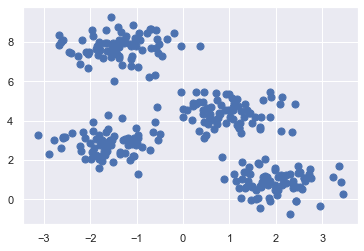

In [ ]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4, 
                      cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [ ]:
y_kmeans

array([0, 2, 3, 2, 0, 0, 1, 3, 2, 2, 1, 2, 3, 2, 0, 3, 3, 0, 1, 1, 0, 0,
       3, 1, 1, 3, 0, 3, 1, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 0, 3, 1, 3, 3,
       1, 1, 2, 1, 2, 0, 1, 0, 2, 0, 0, 1, 2, 1, 2, 0, 2, 3, 2, 1, 1, 1,
       2, 0, 2, 1, 3, 1, 2, 1, 1, 2, 1, 3, 0, 2, 0, 3, 0, 0, 2, 3, 0, 3,
       2, 2, 3, 0, 2, 1, 1, 3, 0, 0, 3, 1, 2, 0, 2, 0, 3, 0, 0, 3, 2, 3,
       1, 1, 0, 2, 0, 3, 2, 0, 0, 3, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1,
       1, 0, 2, 1, 1, 2, 3, 2, 2, 1, 3, 1, 3, 1, 2, 3, 2, 2, 2, 3, 2, 3,
       0, 1, 2, 1, 0, 3, 2, 3, 3, 0, 3, 1, 1, 3, 0, 3, 3, 2, 0, 3, 1, 2,
       0, 0, 3, 1, 0, 3, 1, 1, 3, 3, 3, 3, 0, 2, 3, 1, 3, 3, 1, 1, 1, 3,
       1, 2, 3, 1, 0, 1, 3, 2, 1, 2, 3, 2, 3, 1, 3, 3, 2, 1, 1, 0, 0, 3,
       2, 0, 0, 1, 0, 1, 3, 2, 2, 3, 3, 2, 3, 0, 1, 3, 0, 1, 2, 1, 0, 3,
       0, 2, 2, 2, 2, 1, 1, 2, 3, 1, 0, 3, 1, 1, 1, 0, 0, 2, 3, 3, 1, 0,
       2, 1, 3, 2, 3, 0, 0, 1, 1, 3, 0, 0, 0, 3, 2, 2, 0, 0, 3, 0, 0, 0,
       2, 1, 2, 3, 0, 0, 2, 2, 2, 0, 0, 3, 2, 1])

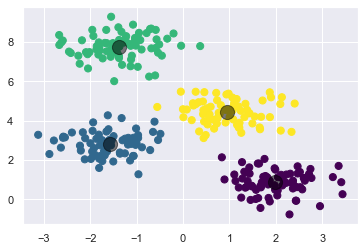

In [ ]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                               for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
        
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:,0], X[:, 1], c=y_kmeans, s=50,cmap='viridis')

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

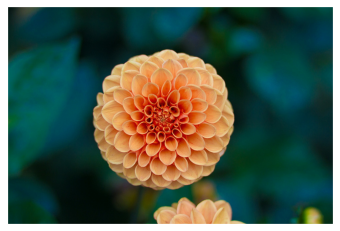

In [ ]:
from sklearn.datasets import load_sample_image
china = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

In [ ]:
china.shape

(427, 640, 3)

In [ ]:
data = china / 255.0 # use 0...1 scale
data = data.reshape(427*640, 3)
data.shape

(273280, 3)

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors =data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))
    
    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))
    
    fig.suptitle(title, size=20);

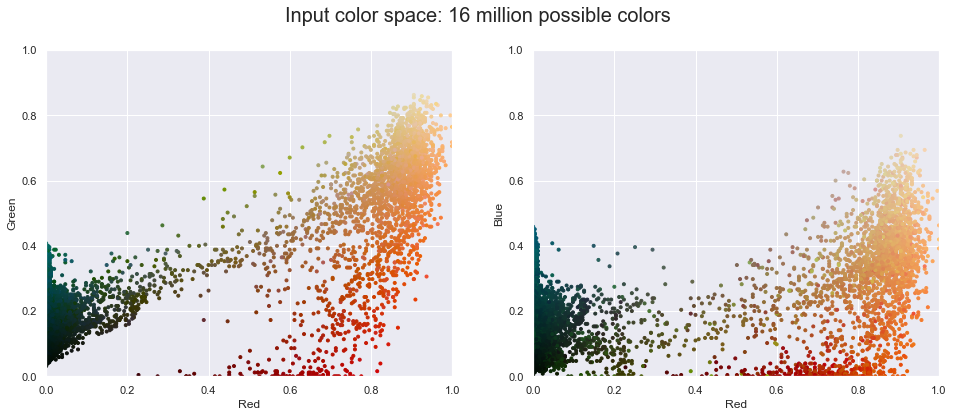

In [ ]:
plot_pixels(data, title='Input color space: 16 million possible colors')

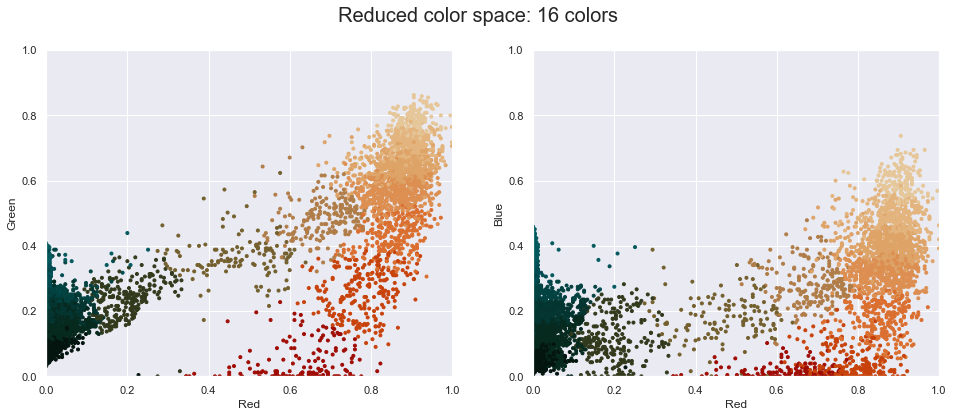

In [ ]:
import warnings; warnings.simplefilter('ignore') # Fix numpy issues

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
           title="Reduced color space: 16 colors")

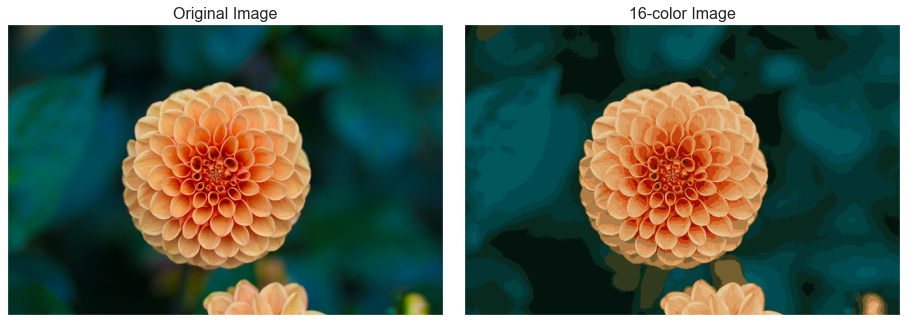

In [ ]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                     subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)

ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);

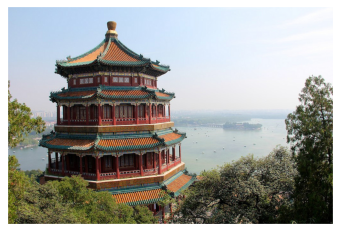

In [ ]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

In [ ]:
china.shape

(427, 640, 3)

In [ ]:
china

array([[[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [250, 251, 255],
        [250, 251, 255],
        [250, 251, 255]],

       [[172, 199, 229],
        [173, 200, 230],
        [173, 200, 230],
        ...,
        [251, 252, 255],
        [251, 252, 255],
        [251, 252, 255]],

       [[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [252, 253, 255],
        [252, 253, 255],
        [252, 253, 255]],

       ...,

       [[ 88,  80,   7],
        [147, 138,  69],
        [122, 116,  38],
        ...,
        [ 39,  42,  33],
        [  8,  14,   2],
        [  6,  12,   0]],

       [[122, 112,  41],
        [129, 120,  53],
        [118, 112,  36],
        ...,
        [  9,  12,   3],
        [  9,  15,   3],
        [ 16,  24,   9]],

       [[116, 103,  35],
        [104,  93,  31],
        [108, 102,  28],
        ...,
        [ 43,  49,  39],
        [ 13,  21,   6],
        [ 15,  24,   7]]

In [ ]:
data = china / 255.0 # use 0...1 scale
data = data.reshape(427*640, 3)
data.shape 

(273280, 3)

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors =data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))
    
    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))
    
    fig.suptitle(title, size=20);

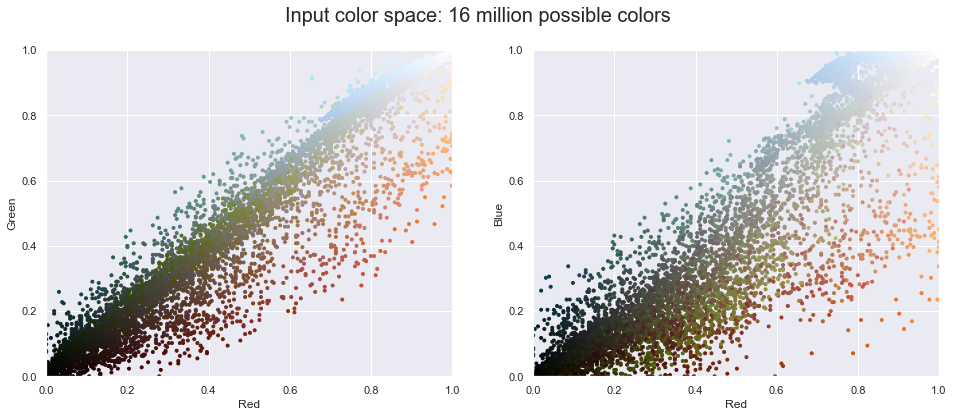

In [ ]:
plot_pixels(data, title='Input color space: 16 million possible colors')

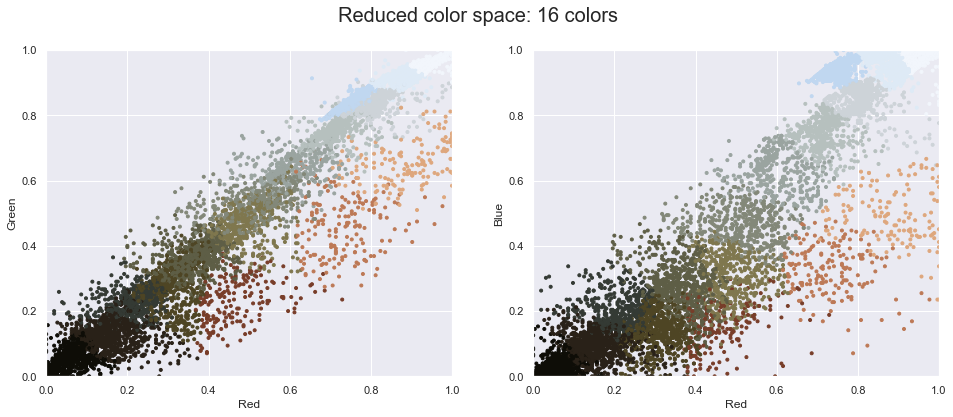

In [ ]:
import warnings; warnings.simplefilter('ignore') # Fix numpy issues

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
           title="Reduced color space: 16 colors")

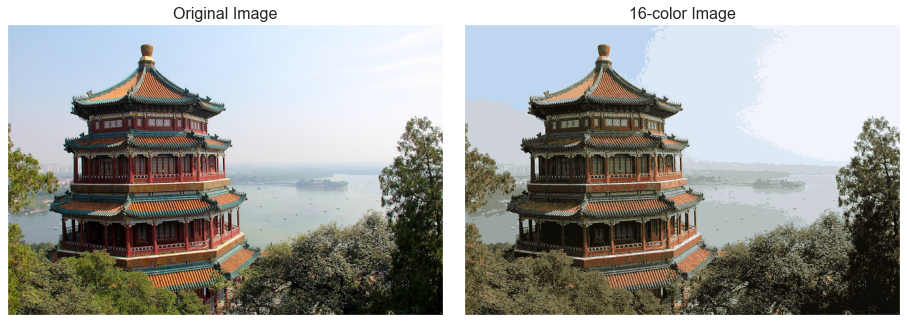

In [ ]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                     subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)

ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);

Principal Component Analysis

In [ ]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

The Data - Cancer data set

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
print(cancer['target_names'])

['malignant' 'benign']


In [ ]:
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# PCA visualization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(n_components=2)

In [ ]:
x_pca = pca.transform(scaled_data)
print(scaled_data.shape)
print(x_pca.shape)

(569, 30)
(569, 2)


Text(0, 0.5, 'Second principal component')

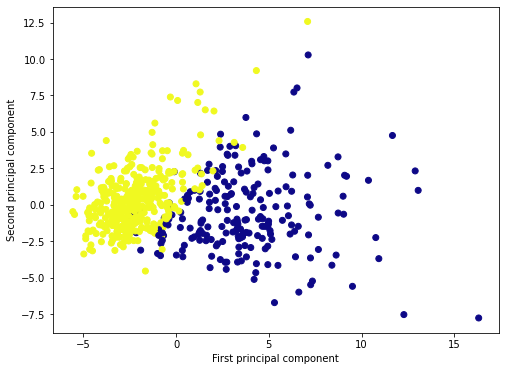

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=cancer['target'], cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')

In [ ]:
# Interpreting the components
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

<AxesSubplot:>

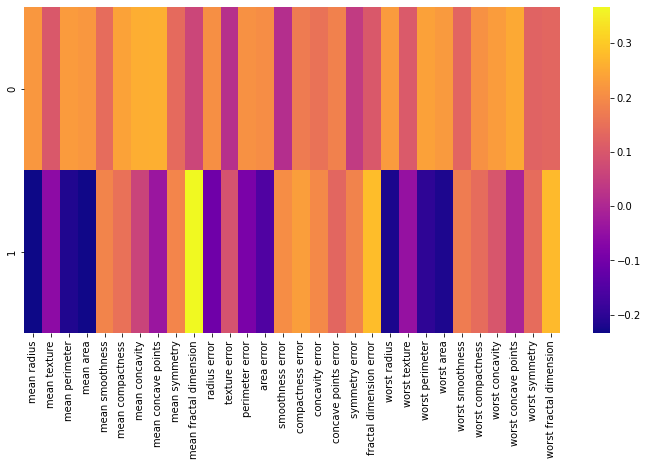

In [ ]:
df_comp = pd.DataFrame(pca.components_, columns=cancer['feature_names'])
plt.figure(figsize=(12, 6))
sns.heatmap(df_comp,cmap='plasma', )

Q-Learning

In [ ]:
import numpy as np

In [ ]:
# Define the states
location_to_state = {
    'L1' : 0,
    'L2' : 1,
    'L3' : 2,
    'L4' : 3,
    'L5' : 4,
    'L6' : 5,
    'L7' : 6,
    'L8' : 7,
    'L9' : 8
}

In [ ]:
# Define actions
actions = [0,1,2,3,4,5,6,7,8]

In [ ]:
# Define the rewards
rewards = np.array([[0,1,0,0,0,0,0,0,0],
                   [1,0,1,0,1,0,0,0,0],
                   [0,1,0,0,0,1,0,0,0],
                   [0,0,0,0,0,0,1,0,0],
                   [0,1,0,0,0,0,0,1,0],
                   [0,0,1,0,0,0,0,0,0],
                   [0,0,0,1,0,0,0,1,0],
                   [0,0,0,0,1,0,1,0,1],
                   [0,0,0,0,0,0,0,1,0]])

In [ ]:
state_to_location = dict((state, location) for location, state in location_to_state.items())

# Inititalize parameters
gamma = 0.75 # Discount factor
alpha = 0.9 # Learning rate

In [ ]:
class QAgent():
    # Initialize alpha, gamma, states, actions, rewards and Q-values
    def __init__(self, alpha, gamma, location_to_state, actions, rewards, state_to_location):
        
        self.gamma = gamma
        self.alpha = alpha
        
        self.location_to_state = location_to_state
        self.actions = actions
        self.rewards = rewards
        self. state_to_location = state_to_location
        
        M = len(location_to_state)
        self.Q = np.zeros((M, M), dtype=None, order='C')
        
    # Training the dataset
    def training(self, start_location, end_location, iterations):
        
        rewards_new = np.copy(self.rewards)
        
        ending_state = self.location_to_state[end_location]
        rewards_new[ending_state, ending_state] = 999
        
        # Picking a random current state
        for i in range(iterations):
            current_state = np.random.randint(0, 9)
            playable_actions = []
            
            # Iterate through the rewards matrix to get the states
            # directly reachable from the randomly chosen current state
            # assign those state in a list named playable_actions
            for j in range(9):
                if rewards_new[current_state, j] > 0:
                    playable_actions.append(j)
                    
            # choosing a random next state
            next_state = np.random.choice(playable_actions)
            
            # finding temporal difference
            TD = rewards_new[current_state, next_state] + \
            self.gamma*self.Q[next_state, np.argmax(self.Q[next_state,])] - self.Q[current_state,next_state]
            
            self.Q[current_state, next_state] += self.alpha*TD
            
        route = [start_location]
        next_location = start_location
        
        # Get the route
        self.get_optimal_route(start_location, end_location, next_location, route, self.Q)
    
    # Get the optimal route
    def get_optimal_route(self, start_location, end_location, next_location, route, Q):

        while(next_location != end_location):
            starting_state = self.location_to_state[start_location]
            next_state = np.argmax(Q[starting_state,])
            next_location = self.state_to_location[next_state]
            route.append(next_location)
            start_location = next_location
            
        print(route)

In [ ]:
qagent = QAgent(alpha, gamma, location_to_state, actions, rewards, state_to_location)
qagent.training('L9', 'L1', 1000)

['L9', 'L8', 'L5', 'L2', 'L1']
